In [55]:
import findspark
findspark.init('/usr/local/spark')
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('proj').getOrCreate()

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
data = spark.read.format('csv').load('Filtered_data.csv',header=True,inferSchema=True)

In [78]:
data.na.drop(how='any')

DataFrame[_c0: int, state: string, district: string, deceased_sex: string, treatment_source: string, month_of_death: int, year_of_death: int, death_symptoms: string, is_death_associated_with_preg: string, marital_status: string, highest_qualification: string, drinking_water_source: string, toilet_used: string]

In [80]:
len(df.count())

13

In [77]:
df['death_symptoms'].count

<bound method Series.count of 0                                NaN
1                                NaN
2                                NaN
3                        Hypothermia
4                                NaN
5                                NaN
6                                NaN
7                                NaN
8                                NaN
9                                NaN
10                               NaN
11               Fever with Jaundice
12                               NaN
13                               NaN
14                               NaN
15                               NaN
16                               NaN
17                               NaN
18                               NaN
19                               NaN
20                               NaN
21                               NaN
22                               NaN
23                               NaN
24                               NaN
25                               NaN
26      

In [58]:
import pandas as pd

In [59]:
df= pd.read_csv("Filtered_data.csv")

In [61]:
df.head()

,Unnamed: 0,state,district,deceased_sex,treatment_source,month_of_death,year_of_death,death_symptoms,is_death_associated_with_preg,marital_status,highest_qualification,drinking_water_source,toilet_used
0,0,RAJASTHAN,JAIPUR,Female,Private Hospital,10,2011,NaN,No,Married and Gauna performed,Literate With formal education-Post Grad/ M.Te...,Piped water into dwelling/yard/plot,Flush/Pour flush latrine connected:-To piped s...
1,1,RAJASTHAN,JAIPUR,Male,Private Hospital,6,2011,NaN,NaN,Married and Gauna performed,Literate with formal education-Graduate/B.Tech...,Piped water into dwelling/yard/plot,Flush/Pour flush latrine connected:-To piped s...
2,2,RAJASTHAN,JAIPUR,Male,Government Hospital,11,2011,NaN,NaN,Married and Gauna performed,Literate With formal education-Middle,Piped water into dwelling/yard/plot,Flush/Pour flush latrine connected:-To piped s...
3,3,RAJASTHAN,JAIPUR,Female,Government Hospital,3,2011,Hypothermia,NaN,Married and Gauna performed,Literate With formal education-Secondary/Matri...,Piped water into dwelling/yard/plot,"open defecation(field, brush,jungle etc.)"
4,4,RAJASTHAN,JAIPUR,Female,No Medical attention,8,2011,NaN,NaN,Married and Gauna performed,Literate With formal education-Below primary,Public tap/standpipe,To septic tank


In [62]:
df.na.drop()

AttributeError: 'DataFrame' object has no attribute 'na'

In [32]:
tc = df.corr()

In [33]:
tc

,Unnamed: 0,month_of_death,year_of_death
Unnamed: 0,1.000000,-0.00964,-0.126452
month_of_death,-0.009640,1.00000,-0.000240
year_of_death,-0.126452,-0.00024,1.000000


In [34]:
#df.drop(df['Unnamed: 0'],inplace=True)

In [35]:
df.head()

,Unnamed: 0,state,district,deceased_sex,treatment_source,month_of_death,year_of_death,death_symptoms,is_death_associated_with_preg,marital_status,highest_qualification,drinking_water_source,toilet_used
0,0,RAJASTHAN,JAIPUR,Female,Private Hospital,10,2011,NaN,No,Married and Gauna performed,Literate With formal education-Post Grad/ M.Te...,Piped water into dwelling/yard/plot,Flush/Pour flush latrine connected:-To piped s...
1,1,RAJASTHAN,JAIPUR,Male,Private Hospital,6,2011,NaN,NaN,Married and Gauna performed,Literate with formal education-Graduate/B.Tech...,Piped water into dwelling/yard/plot,Flush/Pour flush latrine connected:-To piped s...
2,2,RAJASTHAN,JAIPUR,Male,Government Hospital,11,2011,NaN,NaN,Married and Gauna performed,Literate With formal education-Middle,Piped water into dwelling/yard/plot,Flush/Pour flush latrine connected:-To piped s...
3,3,RAJASTHAN,JAIPUR,Female,Government Hospital,3,2011,Hypothermia,NaN,Married and Gauna performed,Literate With formal education-Secondary/Matri...,Piped water into dwelling/yard/plot,"open defecation(field, brush,jungle etc.)"
4,4,RAJASTHAN,JAIPUR,Female,No Medical attention,8,2011,NaN,NaN,Married and Gauna performed,Literate With formal education-Below primary,Public tap/standpipe,To septic tank


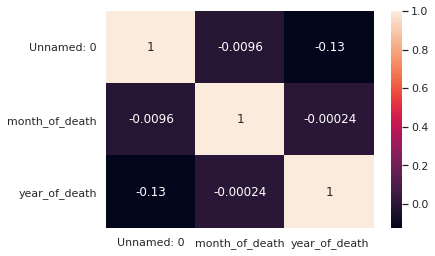

In [47]:
sns.heatmap(tc,annot=True)

In [48]:
type(tc)

pandas.core.frame.DataFrame

In [37]:
df["marital_status"].fillna("null", inplace = True)
df["highest_qualification"].fillna("null", inplace = True)
df["drinking_water_source"].fillna("null", inplace = True)
df["toilet_used"].fillna("null", inplace = True)
df["death_symptoms"].fillna("null", inplace = True)
df["is_death_associated_with_preg"].fillna("null", inplace = True)

In [38]:
state={'RAJASTHAN':1}
district = {'JAIPUR':1}
deceased_sex = {'Female':1,'Male':2}
treatment_source={'Private Hospital':1,'Government Hospital':2,
                  'No Medical attention':3,'Private Dispensary/Clinic':4,
                  'Government PHC':5,'At Home':6,'Others':7,
                  'Private AYUSH Hospital/Clinic':8,'NGO or Trust Hosp/Clinic':9,
                  'Government CHC':10,'Government UHC/UHP/UFWC':11,
                  'Government Sub Center':12,'Government Dispensary/Clinic':13}
marital_status = {'Married and Gauna performed':1, 'Widow/Widower':2, 'Never married':3, 'Separated':4, 'Married but Gauna not performed':5, 'Remarried':6,
       'Not stated':7, 'Divorced':8,'null':0}
highest_qualification={'Literate With formal education-Post Grad/ M.Tech/M.B.A/ MD/Equivalent or higher':1,'Literate with formal education-Graduate/B.Tech/B.B.A/MBBS/Equivalent':2,'Literate With formal education-Middle':3,'Literate With formal education-Secondary/Matric (Class-X)':4,'Literate With formal education-Below primary':5,'Literate Without formal education':6,'Literate With formal education-Primary':7,'null':0,'Literate With formal education-Hr. Secondary/Sr. Secondary/Pre-university (Class XII)':8,'Illiterate':9,'Literate With formal education-Non-technical/Technical diploma or certificate not equivalent to a degree':10}
drinking_water_source={'Piped water into dwelling/yard/plot':1,'Public tap/standpipe':2,'Tube well or Borehole':3, 
                       'Hand pump':4, 'Unprotected dug well':5,
       'Tanker /truck/Cart with Surface watersmall tank':6, 'Surface water':7,
       'other sources':8, 'Protected dug well':9,'null':0}
toilet_used={'Flush/Pour flush latrine connected:-To piped sewer system':1,
       'open defecation(field, brush,jungle etc.)':2, 'To septic tank':3,
       'Pit latrine with slab':4, 'To pit latrine':5, 'To somewhere else':6,
       'community toilet':7,
       'Pit latrine(without flush/ pour flush):-Ventilated Improved Pit(VIP)':8,
       'Open pit /Pit latrine without slab':9,'null':0}
death_symptoms ={'Hypothermia':1, 'Fever with Jaundice':2, 'Others':3, 'Infections':4,
       'Preterm birth/ Low birth weight baby not thriving':5,
       'Bleeding from umbilicus & elsewhere':6,
       'Convulsions soon after birth':7, 'Diarrhoea / Dysentery':8,
       'Asphyxia':9, 'Fever with rash':10, 'Birth injuries':11,
       'Respiratory Infection':12, 'Fever with convulsions':13, 'Jaundice':14,
       'Congenital/birth defects':15,'null':0}
is_death_associated_with_preg = {'No':2, 'null':0, '0':0, 'Yes':1}

In [39]:
df.state = [state[item] for item in df.state]


In [40]:
df.district = [district[item] for item in df.district]


In [41]:
df.deceased_sex = [deceased_sex[item] for item in df.deceased_sex]
df.treatment_source = [treatment_source[item] for item in df.treatment_source]
df.marital_status = [marital_status[item] for item in df.marital_status]


In [42]:
df.drinking_water_source = [drinking_water_source[item] for item in df.drinking_water_source]
df.toilet_used = [toilet_used[item] for item in df.toilet_used]
df.highest_qualification = [highest_qualification[item] for item in df.highest_qualification]
df.death_symptoms = [death_symptoms[item] for item in df.death_symptoms]
df.is_death_associated_with_preg = [is_death_associated_with_preg[item] for item in df.is_death_associated_with_preg]

In [54]:
df.head()

,Unnamed: 0,state,district,deceased_sex,treatment_source,month_of_death,year_of_death,death_symptoms,is_death_associated_with_preg,marital_status,highest_qualification,drinking_water_source,toilet_used
0,0,1,1,1,1,10,2011,0,2,1,1,1,1
1,1,1,1,2,1,6,2011,0,0,1,2,1,1
2,2,1,1,2,2,11,2011,0,0,1,3,1,1
3,3,1,1,1,2,3,2011,1,0,1,4,1,2
4,4,1,1,1,3,8,2011,0,0,1,5,2,3


In [ ]:
df.na.drop()

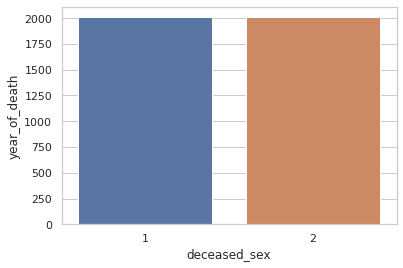

In [19]:
sns.set(style="whitegrid")
sns.barplot(x='deceased_sex',y='year_of_death',data=df)

In [27]:
t = df['marital_status']
t1=df['year_of_death'] 

TypeError: list indices must be integers or slices, not str

In [21]:
type(t)

pandas.core.series.Series

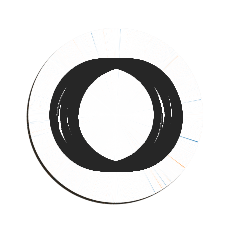

In [22]:
colors = ["#1f77b4", "#ff7f0e"]
plt.pie(t,colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.show()

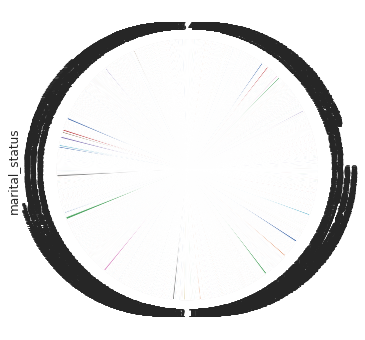

In [23]:
t.plot.pie(figsize=(6, 6))


In [24]:
import cufflinks as cf
f.set_config_file(world_readable=True,offline=False)

NameError: name 'f' is not defined

In [46]:
df.to_csv('data.csv')

In [51]:
data = spark.read.format('csv').load('data.csv',inferSchema=True,header=True)

In [52]:
type(data)

pyspark.sql.dataframe.DataFrame

In [53]:
train_data,test_data =data.randomSplit([0.7,0.3])

In [91]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [92]:
rf = RandomForestClassifier(labelCol="label", featuresCol="year_of_death", numTrees=20)

In [94]:
model = rf.fit(train_data)

IllegalArgumentException: 'requirement failed: Column year_of_death must be of type struct<type:tinyint,size:int,indices:array<int>,values:array<double>> but was actually int.'

In [ ]:
+
